Variation 1 (epoch=75)

In [1]:
#Reading the data from the excel file created in the source file
import pandas as pd
data1=pd.read_excel('C:\\Users\\satya\\rosenbrock.xlsx')
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,0.486881,-0.773397,-0.050534,0.084568,-0.032604,-0.736818,0.295694,0.497740,-0.561831,298.125329
1,1,0.629629,0.957705,-0.659850,0.121552,0.824153,0.828809,-0.006234,0.237842,0.895073,487.138146
2,2,-0.712852,0.948625,0.572676,0.660235,-0.214652,0.542341,-0.398283,-0.982550,-0.914472,650.471675
3,3,-0.432045,0.884390,-0.044217,-0.804677,-0.516557,0.775618,-0.645234,0.445783,0.959935,568.687717
4,4,0.179924,0.043875,0.216944,-0.876370,-0.753894,0.685081,0.842100,0.230466,-0.526571,402.819802
...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,0.467579,-0.860763,0.800176,-0.560314,-0.392197,0.018670,-0.938476,-0.842295,-0.976001,998.068631
2496,2496,0.833969,-0.392949,0.347030,-0.678596,0.920039,-0.584858,-0.387439,-0.669473,0.843922,560.507127
2497,2497,0.202129,-0.514602,0.105609,-0.849493,0.763000,0.491210,0.295731,-0.483899,-0.334942,183.950358
2498,2498,-0.176911,-0.005577,-0.846307,0.465155,0.474745,0.610356,-0.262790,0.604143,-0.765866,304.714127


In [2]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1.values)

In [3]:
X=scaled_data[:,1:10]
y=scaled_data[:,10]

In [4]:
#Splitting the data using sklearn function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0) #Random state: to obtain the same data every time we run kernel

In [5]:
X_train.shape #to know the size of the dataset

(2125, 9)

In [6]:
#Creating sequential ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
#Creating ANN with mentioned nodes, hidden layers,inputs,outputs and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='relu'))
model.add(Dense(110,activation='relu'))
model.add(Dense(1,activation='linear'))

In [8]:
print(model.summary()) #model summary of total,trainable and non trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 110)               11110     
                                                                 
 dense_2 (Dense)             (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#Training the ANN using adam optimiser and MSE as loss fn.
model.compile(optimizer='adam',loss='MSE')

In [10]:
#Validation splits and iterations and varying the epoch value keeping all other parameters constant
history=model.fit(X_train,y_train,epochs=75,validation_split=0.15)

Epoch 1/75
57/57 [==============================] - 1s 4ms/step - loss: 0.0282 - val_loss: 0.0133
Epoch 2/75
57/57 [==============================] - 0s 1ms/step - loss: 0.0107 - val_loss: 0.0083
Epoch 3/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0073
Epoch 4/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 5/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 6/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 7/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 8/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 9/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/75
57/57 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 11/75
57/57 [

In [11]:
from sklearn.metrics import r2_score

In [12]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 911us/step


In [13]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9775421737483203

In [14]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 873us/step


0.9310908018594557

In [15]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 725us/step


0.0005581745642266356

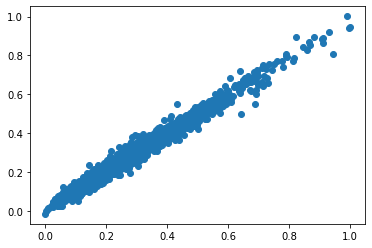

In [18]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

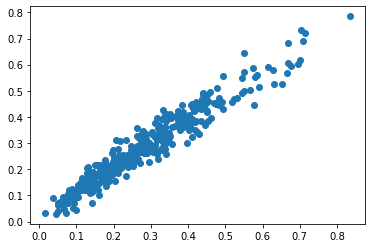

In [19]:
p.scatter(y_test,y_test_pre)

Variation 2 (epoch = 120)

In [30]:
#Validation splits and iterations and variation of epoch value, iteration 2
history=model.fit(X_train,y_train,epochs=120,validation_split=0.15)

Epoch 1/120
57/57 [==============================] - 0s 3ms/step - loss: 3.1689e-04 - val_loss: 0.0017
Epoch 2/120
57/57 [==============================] - 0s 2ms/step - loss: 3.1892e-04 - val_loss: 0.0021
Epoch 3/120
57/57 [==============================] - 0s 3ms/step - loss: 3.0592e-04 - val_loss: 0.0011
Epoch 4/120
57/57 [==============================] - 0s 3ms/step - loss: 3.2923e-04 - val_loss: 0.0011
Epoch 5/120
57/57 [==============================] - 0s 2ms/step - loss: 3.0790e-04 - val_loss: 0.0017
Epoch 6/120
57/57 [==============================] - 0s 3ms/step - loss: 2.9128e-04 - val_loss: 0.0014
Epoch 7/120
57/57 [==============================] - 0s 3ms/step - loss: 3.1802e-04 - val_loss: 0.0012
Epoch 8/120
57/57 [==============================] - 0s 3ms/step - loss: 2.9666e-04 - val_loss: 0.0014
Epoch 9/120
57/57 [==============================] - 0s 2ms/step - loss: 3.1544e-04 - val_loss: 0.0016
Epoch 10/120
57/57 [==============================] - 0s 2ms/step - loss:

Epoch 80/120
57/57 [==============================] - 0s 2ms/step - loss: 2.6709e-04 - val_loss: 0.0010
Epoch 81/120
57/57 [==============================] - 0s 1ms/step - loss: 2.3603e-04 - val_loss: 0.0012
Epoch 82/120
57/57 [==============================] - 0s 2ms/step - loss: 2.4679e-04 - val_loss: 0.0010
Epoch 83/120
57/57 [==============================] - 0s 2ms/step - loss: 2.4446e-04 - val_loss: 0.0011
Epoch 84/120
57/57 [==============================] - 0s 2ms/step - loss: 2.5610e-04 - val_loss: 0.0011
Epoch 85/120
57/57 [==============================] - 0s 1ms/step - loss: 2.4162e-04 - val_loss: 0.0010
Epoch 86/120
57/57 [==============================] - 0s 1ms/step - loss: 2.2736e-04 - val_loss: 0.0015
Epoch 87/120
57/57 [==============================] - 0s 1ms/step - loss: 2.4651e-04 - val_loss: 0.0012
Epoch 88/120
57/57 [==============================] - 0s 1ms/step - loss: 2.3267e-04 - val_loss: 0.0011
Epoch 89/120
57/57 [==============================] - 0s 1ms/ste

In [33]:
from sklearn.metrics import r2_score

In [34]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 1ms/step


In [35]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9879405252945831

In [36]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 2ms/step


0.9275041861009446

In [37]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 982us/step


0.0002997303462526693

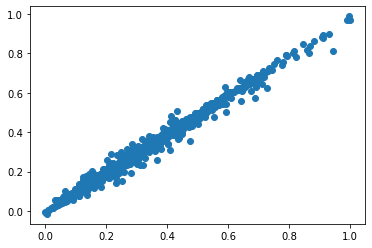

In [38]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

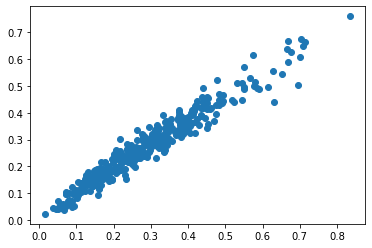

In [39]:
p.scatter(y_test,y_test_pre)

In [40]:
#Validation splits and iterations
history=model.fit(X_train,y_train,epochs=150,validation_split=0.15)

Epoch 1/150
57/57 [==============================] - 0s 3ms/step - loss: 1.7666e-04 - val_loss: 0.0011
Epoch 2/150
57/57 [==============================] - 0s 2ms/step - loss: 1.7004e-04 - val_loss: 0.0011
Epoch 3/150
57/57 [==============================] - 0s 3ms/step - loss: 1.5172e-04 - val_loss: 0.0011
Epoch 4/150
57/57 [==============================] - 0s 3ms/step - loss: 1.6902e-04 - val_loss: 9.9701e-04
Epoch 5/150
57/57 [==============================] - 0s 4ms/step - loss: 1.6916e-04 - val_loss: 9.7435e-04
Epoch 6/150
57/57 [==============================] - 0s 3ms/step - loss: 1.6529e-04 - val_loss: 0.0011
Epoch 7/150
57/57 [==============================] - 0s 2ms/step - loss: 1.5637e-04 - val_loss: 0.0011
Epoch 8/150
57/57 [==============================] - 0s 2ms/step - loss: 1.7541e-04 - val_loss: 0.0015
Epoch 9/150
57/57 [==============================] - 0s 2ms/step - loss: 1.5996e-04 - val_loss: 0.0011
Epoch 10/150
57/57 [==============================] - 0s 3ms/step

In [41]:
from sklearn.metrics import r2_score

In [42]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 746us/step


In [43]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9903288780197244

In [44]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 2ms/step


0.9350146097912864

In [45]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 701us/step


0.0002403694033619681

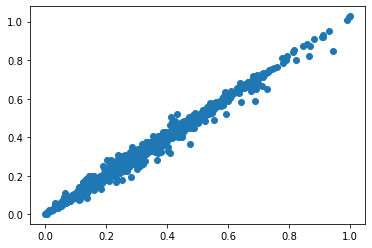

In [46]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

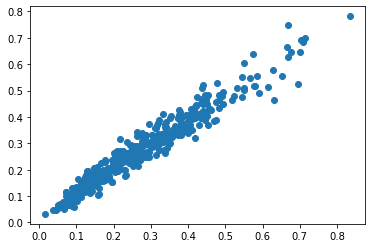

In [47]:
p.scatter(y_test,y_test_pre)